# Numpy Crash Course

In [1]:
from skimage import data
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["font.size"] = 18
matplotlib.rcParams["figure.figsize"] = (8, 6)

camera = data.camera()

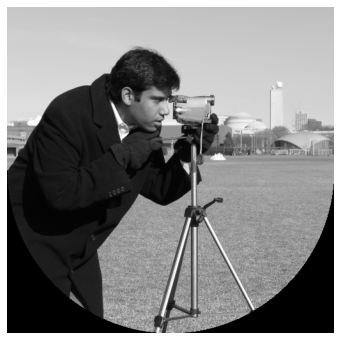

uint8 0 255 (512, 512) 200


In [39]:
def plot_img(image):
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)
    plt.axis("off")
    plt.show()
    
def img_info(image):
    if image.ndim == 2:
        print(image.dtype, image.min(), image.max(), image.shape, image[0,0])
    else:
        print(image.dtype, image.min(), image.max(), image.shape, image[0,0,:])
        

plot_img(camera)
img_info(camera)

In [3]:
# numpy.ndarray
type(camera)

numpy.ndarray

In [4]:
# pixel geometry
camera.shape

(512, 512)

In [5]:
# number of pixels
camera.size

262144

In [6]:
# info about pixel intensity
camera.min(), camera.max()

(0, 255)

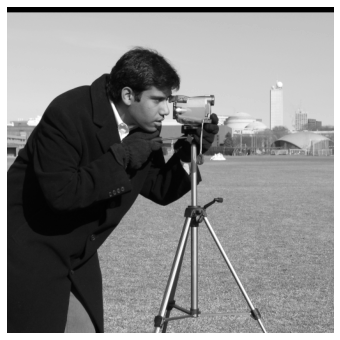

In [7]:
# indexing row and column --> top left is 0,0
camera[10,20]
camera[3, 10] = 0
camera[:10] = 0
camera

plot_img(camera)

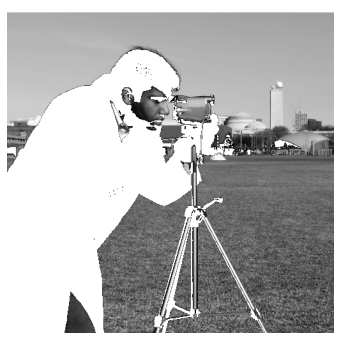

In [8]:
# masking --> indexing with booleans
mask = camera < 87
# set pixel to white where mask is true
camera[mask] = 255

plot_img(camera)

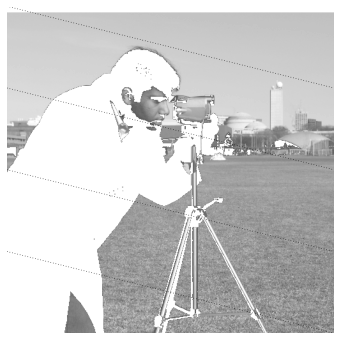

In [9]:
# fancy masking
inds_r = np.arange(len(camera))
inds_c = 4 * inds_r % len(camera)
camera[inds_r, inds_c] = 0

plot_img(camera)

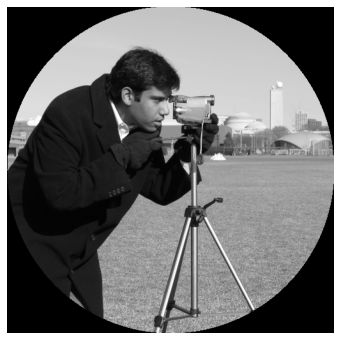

In [10]:
# more fancy masking
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols /2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)

camera = data.camera()
camera[outer_disk_mask] = 0
plot_img(camera)

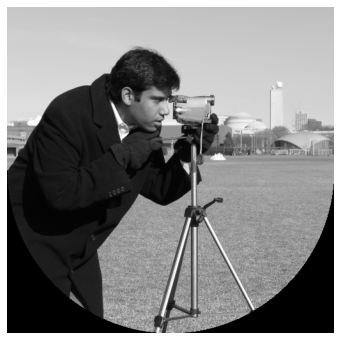

In [11]:
lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half, outer_disk_mask)

camera = data.camera()
camera[lower_half_disk] = 0
plot_img(camera)

In [12]:
# color images --> trailing channels, but still 2D
cat = data.chelsea()
print(type(cat))
print(cat.shape)

<class 'numpy.ndarray'>
(300, 451, 3)


In [13]:
# RGB at pixel location, 8bit unsigned int
cat[10,20]

array([151, 129, 115], dtype=uint8)

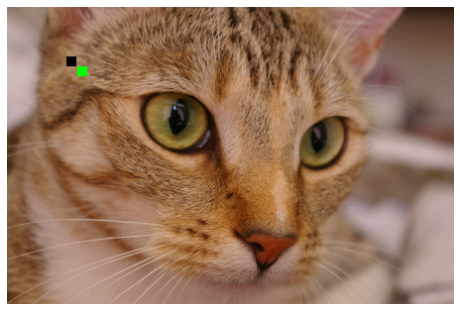

In [14]:
# pixel = [red, green, blue]
cat[50:60,60:70] = 0
cat[60:70,71:81] = [0, 255, 0]
plot_img(cat)

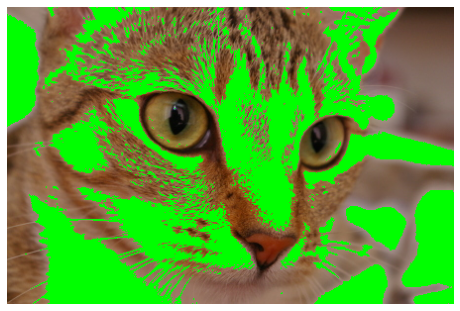

In [15]:
# boolean mask with 2D color
cat = data.chelsea()
reddish = cat[:, :, 0] > 160
cat[reddish] = [0, 255, 0]
plot_img(cat)

(100, 100)
14248


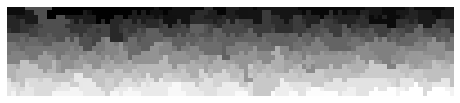

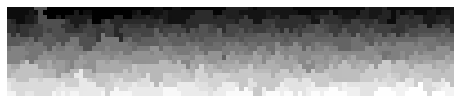

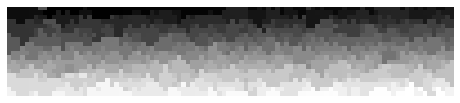

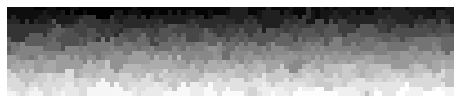

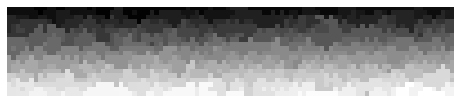

In [16]:
# extras on 3D images
from skimage import segmentation
from scipy import ndimage as ndi

im3d = np.random.rand(20, 100, 100)
seeds, features, = ndi.label(im3d < 0.1)
print(seeds[0].shape)
print(features)

we = segmentation.watershed(im3d, seeds)

for i in range(5):
    plot_img(we[:,:,i])

# Image Data Types

In [17]:
# for images allowed float range is between [-1,1] or [0,1]
# out of range floats will be converted

from skimage.util import img_as_float

image = np.arange(0,50,10,dtype=np.uint8)

print(image.astype('float'))
print(img_as_float(image))


[ 0. 10. 20. 30. 40.]
[0.         0.03921569 0.07843137 0.11764706 0.15686275]


In [18]:
# functions to convert images to dtype and rescale
from skimage.util import img_as_ubyte

image = np.array([0, 0.5, 1], dtype=float)
img_as_ubyte(image)

array([  0, 128, 255], dtype=uint8)

In [19]:
# dtype conversion can result in precision loss
image = np.array([0, 0.503, 1], dtype=float)
img_as_ubyte(image)

array([  0, 128, 255], dtype=uint8)

In [20]:
# preserve range of data after dtype conversion
# data may be a physical measurement... rainfall, velocity

from skimage import data
from skimage.transform import rescale

image = data.coins()
img_info(image)

rescaled = rescale(image, scale=0.5)
img_info(rescaled)

rescaled_preserve = rescale(image, scale=0.5, preserve_range=True)
img_info(rescaled_preserve)


uint8 1 252 (303, 384)
float64 0.01568627450980303 0.9113906088751303 (152, 192)
float64 3.9999999999997726 232.40460526315823 (152, 192)


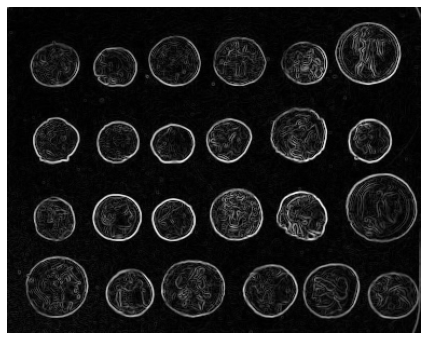

In [21]:
# dtype conversions can be used to specify image output types after processing
from skimage.util import img_as_uint
from skimage.filters import sobel

out = img_as_uint(sobel(image))

plot_img(out)

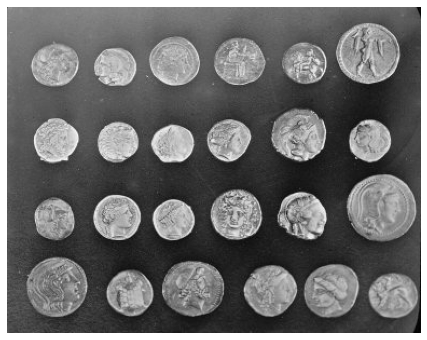

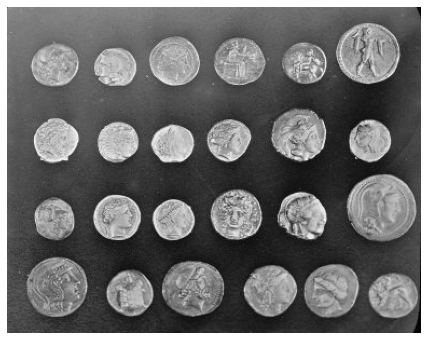

In [22]:
# rescaling intensity values --> load a 10, 12, 16bit image
# this is advanced, something to consider...
# will need to specify a conversion expression with in_range

from skimage import exposure
from skimage import data

image = data.coins()
plot_img(image)
image = exposure.rescale_intensity(image, in_range=(0, 2**10 - 1))
plot_img(image)

# Image Adjustment

In [40]:
# conversion between color models
# RGB = [red, green, blue]
# RGBa = [red, green, blue, alpha]
# HSV = [hue, saturation, blue]

from skimage.color import rgba2rgb, rgb2gray, rgb2hsv

# RGB --> HSV
rgb_pixel = np.array([[[0,0,100]]], dtype=np.uint8)
hsv_pixel = rgb2hsv(rgb_pixel)
img_info(rgb_pixel)
img_info(hsv_pixel)

# RGBa --> RGB
img_rgba = data.logo()
img_rgb = rgba2rgb(img_rgba)
img_info(img_rgb)
img_info(img_rgba)

# RGB --> gray, weighted to preserve luminance
img = data.astronaut()
img_gray = rgb2gray(img)
img_info(img)
img_info(img_gray)

uint8 0 100 (1, 1, 3) [  0   0 100]
float64 0.39215686274509803 1.0 (1, 1, 3) [0.66666667 1.         0.39215686]
float64 0.0 1.0 (500, 500, 3) [1. 1. 1.]
uint8 0 255 (500, 500, 4) [255 255 255 255]
uint8 0 255 (512, 512, 3) [154 147 151]
float64 0.0 1.0 (512, 512) 0.5834349019607843


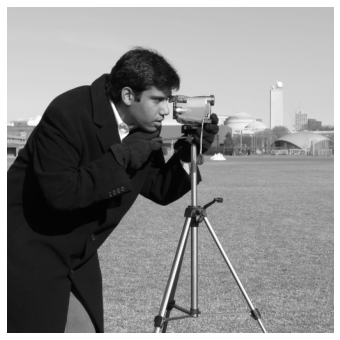

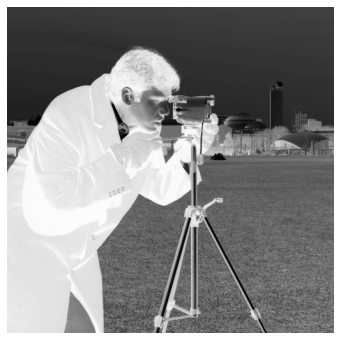

In [43]:
# image inversion
# pixel values are repalced by difference from image max for gray and RGB
# pixel true and false are swapped for binary

from skimage.util import invert

img = data.camera()
plot_img(img)
invert = invert(img)
plot_img(invert)



In [ ]:
# painting images with labels
# think color fill for segements

# no detailed example in usage guide
# this may be important... will continue to investigate

uint8 10 197 (172, 448) 91


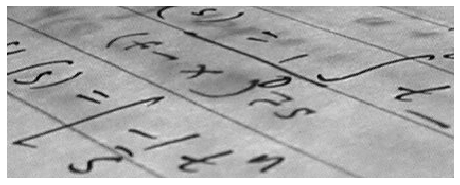

uint8 0 255 (172, 448) 110


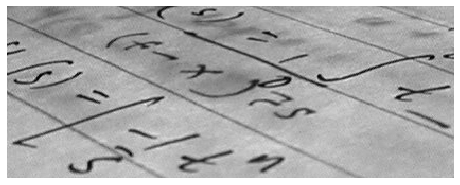

In [47]:
# contrast and exposure
# match range of colors in an image to dtype
# uses a linear transformation or percentile range

from skimage.exposure import rescale_intensity

text = data.text()
better_contrast = rescale_intensity(text)

img_info(text)
plot_img(text)
img_info(better_contrast)
plot_img(better_contrast)


uint8 0 255 (512, 512) 116


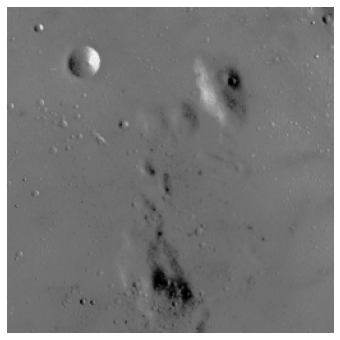

10.0 186.0
uint8 0 255 (512, 512) 153


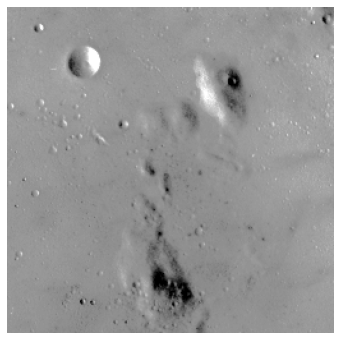

In [50]:
# enhance contrast with percentile range

moon = data.moon()
img_info(moon)
plot_img(moon)
v_min, v_max = np.percentile(moon, (0.2, 99.8))
print(v_min, v_max)

better_contrast = rescale_intensity(moon, in_range=(v_min, v_max))
img_info(better_contrast)
plot_img(better_contrast)


In [48]:
np.percentile?

Signature:
np.percentile(
    a,
    q,
    axis=None,
    out=None,
    overwrite_input=False,
    interpolation='linear',
    keepdims=False,
)
Docstring:
Compute the q-th percentile of the data along the specified axis.

Returns the q-th percentile(s) of the array elements.

Parameters
----------
a : array_like
    Input array or object that can be converted to an array.
q : array_like of float
    Percentile or sequence of percentiles to compute, which must be between
    0 and 100 inclusive.
axis : {int, tuple of int, None}, optional
    Axis or axes along which the percentiles are computed. The
    default is to compute the percentile(s) along a flattened
    version of the array.

    .. versionchanged:: 1.9.0
        A tuple of axes is supported
out : ndarray, optional
    Alternative output array in which to place the result. It must
    have the same shape and buffer length as the expected output,
    but the type (of the output) will be cast if necessary.
overwrite_input : b

In [23]:
ndi.label?

Signature: ndi.label(input, structure=None, output=None)
Docstring:
Label features in an array.

Parameters
----------
input : array_like
    An array-like object to be labeled. Any non-zero values in `input` are
    counted as features and zero values are considered the background.
structure : array_like, optional
    A structuring element that defines feature connections.
    `structure` must be centrosymmetric
    (see Notes).
    If no structuring element is provided,
    one is automatically generated with a squared connectivity equal to
    one.  That is, for a 2-D `input` array, the default structuring element
    is::

        [[0,1,0],
         [1,1,1],
         [0,1,0]]

output : (None, data-type, array_like), optional
    If `output` is a data type, it specifies the type of the resulting
    labeled feature array.
    If `output` is an array-like object, then `output` will be updated
    with the labeled features from this function.  This function can
    operate in-place, b

In [24]:
segmentation.watershed?

Signature:
segmentation.watershed(
    image,
    markers=None,
    connectivity=1,
    offset=None,
    mask=None,
    compactness=0,
    watershed_line=False,
)
Docstring:
Find watershed basins in `image` flooded from given `markers`.

Parameters
----------
image : ndarray (2-D, 3-D, ...) of integers
    Data array where the lowest value points are labeled first.
markers : int, or ndarray of int, same shape as `image`, optional
    The desired number of markers, or an array marking the basins with the
    values to be assigned in the label matrix. Zero means not a marker. If
    ``None`` (no markers given), the local minima of the image are used as
    markers.
connectivity : ndarray, optional
    An array with the same number of dimensions as `image` whose
    non-zero elements indicate neighbors for connection.
    Following the scipy convention, default is a one-connected array of
    the dimension of the image.
offset : array_like of shape image.ndim, optional
    offset of the c

In [25]:
np.logical_and?

Call signature:  np.logical_and(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'logical_and'>
File:            ~/.pyenv/versions/3.8.0/envs/proj/lib/python3.8/site-packages/numpy/__init__.py
Docstring:      
logical_and(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Compute the truth value of x1 AND x2 element-wise.

Parameters
----------
x1, x2 : array_like
    Input arrays.
    If ``x1.shape != x2.shape``, they must be broadcastable to a common
    shape (which becomes the shape of the output).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the i